<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/master/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Iterative Methods**
**Hilaire Bouaddi**

# **Abstract**

In this report, we are going to implement first some methods to approximate solutions of the linear system $Ax = b$. We will implement Jacobi's iteration and Gauss-Seidel's iteration based on the lecture notes. Then we will implement the Newton's Method seen in lecture to approximate the solution of $f(x) = 0$ when f is non linear both in 1d and in multi dimensions. For that we will expand the formula seen in lecture from the derivative of the function to the Jacobian. 



# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [200]:
import time
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# **Introduction**

System of equations are omnipresent in physics when scientists try to write the laws of motion in a dynamical system. The equations can be either nonlinear or linear/linearized. The linear systems take the form $Ax = b$. It is important to have efficient algorithms this kind of equations. A naive solver would have to invert A. In this lab, we will explore solutions that don't have a fixed number of iterations but stop when the approximation becomes good enough. Through the lab we are going to represent this using the variable $TOL$ for tolerance. 

Non-linear systems are harder to solve but are very easy to find (the most famous example is the pendulum). We will explore the Newton's method. 

Hypotheses: 
* Some routine operations like the dot product are allowed to be done with the NumPy Library
* We don't have to approximate the inverse of matrices for Newton's Methods. 
* We don't have to use approximations for the derivatives and assume they are given. 


# **Method**

## Jacobi iteration 

This algorithm is based on this formula from the course:
$x_i^{(k+1)} = a_{ii}^{-1} (b_i - \sum_{j\neq i}{a_{ij}x_{j}^{(k)}})$

In [201]:
# Input: matrix A, vector b
# Output: vector x

def jacobi_iteration(A, b):
    x = np.random.rand(len(b))
    
    res = [b-np.dot(A, x)]
    
    TOL = 1e-9
    
    counter = 0
    
    while np.linalg.norm(res[-1]) > TOL:
        counter += 1
        
        new_x = []
        
        for i in range(len(b)):            
            sum_ = 0
            for j in range(len(b)):
                if j != i:
                    sum_ += A[i, j]*x[j]
            
            new_x.append(1/A[i, i] * (b[i] - sum_))
            
        x = new_x
        
        res.append(b-np.dot(A, x))
        #print(f"x^{counter} = {x}")
        #print(f"residual = {res}")
    
    return x, np.array(res)


## Gauss-Seidel Iteration

This algorithm is based on this formula from the course: 

$x_i^{(k+1)} = a_{ii}^{-1} (b_i - \sum_{j<i}{a_{ij}x_j^{(k+1)}} - \sum_{j>i}{a_{ij}x_{j}^{(k)}})$

In [202]:
# Input: matrix A, vector b
# Output: vector x

def gauss_seidel_iteration(A, b):
    x = np.random.rand(len(b))
    
    res = [b-np.dot(A, x)]
    
    TOL = 1e-9
    
    counter = 0
    
    while np.linalg.norm(res[-1]) > TOL:
        counter += 1
        
        new_x = []
        
        for i in range(len(b)):            
            sum_less = 0
            sum_more = 0 
            for j in range(i):
                sum_less += A[i, j]*new_x[j]
            for j in range(i+1, len(b)):
                sum_more += A[i, j]*x[j]
            
            new_x.append(1/A[i, i] * (b[i] - sum_less - sum_more))
            
        x = new_x
        
        res.append(b-np.dot(A, x))
        #print(f"x^{counter} = {x}")
        #print(f"residual = {res}")
    
    return x, np.array(res)


## Newton's method

This algorithm is based on algorithm 8.2 from the course.

In [203]:
# Input: scalar function f(x)
# Output: real number x

def newton_method(f):
    x = 1
    TOL = 1e-9
    
    while abs(f(x)) > TOL: 
        x = x - f(x) / f.prime(x)
    
    return x

## Extra: Newton's method for vector nonlinear equation f(x)=0

In [204]:


def newton_method_multi_d(f, expected_solution):
    x = np.random.rand(2)
    TOL = 1e-9
    
    errors = [np.abs(expected_solution - f(x))]
    
    while np.linalg.norm(f(x)) > TOL: 
        
        jacobian_x_inverted = np.linalg.inv(f.jacobian_x(x))   
        x = x - np.dot(f(x), jacobian_x_inverted)
        errors.append(np.abs(expected_solution - f(x)))
    return x, errors
    
    

# **Results**

Here we are going to test the different algoritms implemented in the lab. 

## Testing Jacobi Iteration and Gauss-Seildel iteration

In [205]:
## Tests convergence of residual || Ax-b ||, || x-y || for manufactured/exact solution y 

A = np.array([[6, 3, 1], 
             [1, 2, 1], 
             [-2, 0, 1]]) 

b = np.array([1, 2, 5])

We have defined $Ax = b$ such that $\begin{cases}
    6x_0 &+ 3x_1 &+x_2 &= 1 \\ 
    x_0 &+ 2x_1 &+ x_2 &= 2 \\ 
    -2x_0 &&+ x_2 &= 5
\end{cases}$ with the theoretical solution $x = (1/7, -12/7, 37/7)$

The solution given by jacobi_iteration is [0.14285714285367548, -1.714285714190103, 5.285714286023652]
A(x)=[1. 2. 5.] ; ||Ax-b|| = 8.235643185954079e-10
(112, 3)
The solution given by gauss-seidel is [0.1428571429254033, -1.7142857142288084, 5.285714285850807]
A(x)=[1. 2. 5.] ; ||Ax-b|| = 7.84413820591349e-10
(82, 3)


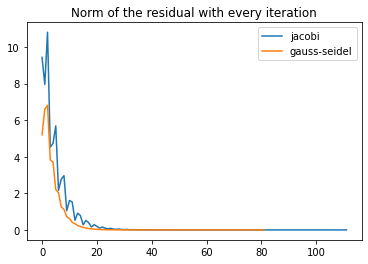

In [206]:
x, residuals_jacobi = jacobi_iteration(A, b)

print(f"The solution given by jacobi_iteration is {x}")
print(f"A(x)={np.dot(A,x)} ; ||Ax-b|| = {np.linalg.norm(np.dot(A,x)-b)}")
print(residuals_jacobi.shape)

x, residuals_gs = gauss_seidel_iteration(A, b)

print(f"The solution given by gauss-seidel is {x}")
print(f"A(x)={np.dot(A,x)} ; ||Ax-b|| = {np.linalg.norm(np.dot(A,x)-b)}")
print(residuals_gs.shape)


plt.plot([np.linalg.norm(res) for res in residuals_jacobi], label="jacobi")
plt.plot([np.linalg.norm(res) for res in residuals_gs], label="gauss-seidel")
plt.title("Norm of the residual with every iteration")
plt.legend()

## Testing Newton Method Iteration 

For this test, we will try to solve the simple (non linear) equation $cos(x) = 0$ 

In [207]:
class Cos:
    
    def __call__(self, x):
        return np.cos(x)
    
    def prime(self, x):
        return -np.sin(x)
    
f = Cos()

x = newton_method(f)

print(f"The solution given by our newton's method is x = {x}")
print(f"f(x)={f(x)} ; ||f(x)|| = {np.linalg.norm(f(x))}")

The solution given by our newton's method is x = 1.5707963267954879
f(x)=-5.91243550575401e-13 ; ||f(x)|| = 5.91243550575401e-13


## Testing Newton's method for vector nonlinear equation f(x)=0

In [208]:
class f1:
    def __call__(self, x):
        return np.cos(x[0]) + np.sin(x[1]) 
    
    # derivative of f1 with respect to x_0
    def df1_x0(self, x):
        return -np.sin(x[0])
    
    def df1_x1(self, x):
        return np.cos(x[1])

class f2:
    def __call__(self, x):
        return np.sin(x[0]* x[1])
    
    def df2_x0(self, x):
        return np.cos(x[0]*x[1])
    
    def df2_x1(self, x):
        return np.cos(x[0]*x[1])

class f: 
    def __init__(self, f1, f2):
        self.f1 = f1
        self.f2 = f2
    
    def __call__(self, x):
        return np.array([self.f1(x), self.f2(x)])
    
    # returns the jacobian evaluated in x
    def jacobian_x(self, x):
        
        return np.array([[self.f1.df1_x0(x), self.f1.df1_x1(x)], 
                         [self.f2.df2_x0(x), self.f2.df2_x1(x)]])
    
f1 = f1()
f2 = f2()
f = f(f1, f2)


We have defined the following function: 
$f(x) = \begin{pmatrix}
    cos(x_0) + sin(x_1) \\
    sin(x_0x_1)
\end{pmatrix}$ with the following Jacobian: 
$J_f(x) = \begin{pmatrix} 
    -sin(x_0) & cos(x_1) \\
    cos(x_0x_1) & cos(x_0x_1)
\end{pmatrix}$ 

The obvious solution of $f(x) = 0$ is $x = (\pi/2, 0)$

The solution given by our newton's method is [ 1.57079633e+00 -2.64015876e-10]
f(x)=[ 1.05113795e-16 -4.14715169e-10] ; ||f(x)|| = 4.147151687254031e-10


Text(0.5, 0, 'k iteration')

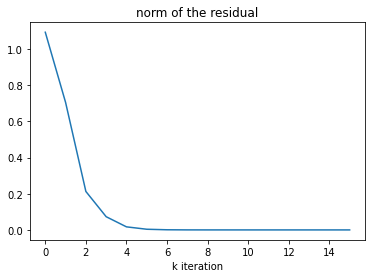

In [209]:
x, errors = newton_method_multi_d(f, [np.pi/2, 0])

print(f"The solution given by our newton's method is {x}")
print(f"f(x)={f(x)} ; ||f(x)|| = {np.linalg.norm(f(x))}")

residuals_norms = [np.linalg.norm(f(e)) for e in errors] 

plt.plot(residuals_norms)
plt.title("norm of the residual")
plt.xlabel("k iteration")

# **Discussion**

Let's first talk about the Jacobi and Gauss Seidel iterations. They both manage to find a good approximation to the solution. 
The Gauss-Seidel iteration consistently converges faster than Jacobi's. From the graph of the norm of the residuals, it also seems like the Gauss-Seidel iteration is more stable. 

The Newton method managed to find the solutions of the non linear systems. It could have been interesting to implement an approximation of the derivative/jacobian instead of it being given. 